<a href="https://colab.research.google.com/github/dm-sap/dm-sap/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np    
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import math
from google.colab import drive
import random
from matplotlib.pyplot import figure
#drive.mount('/content/drive')

# **Prima Parte:**

## **Metodo VALORI MEDI:**

*Definizione della funzione:*

In [3]:
def f(x): 
  return np.e**(-x**2 / 2)

## Metodo **Average**:

Il metodo di simulazione Montecarlo Average consiste nel generare un ascissa uniforme in  $(a,b)$  e successivamente incremeatare un contatore $steps$ con il valore di $f(x)$.\
L'area del grafino infine sarà uguale a $steps$ che moltiplica l'incremento minimo $\delta x$ che compio :
\begin{equation}
Area\,=\,steps\, \frac{(b−a)}{Punti\,totali}
\end{equation}

In [42]:
PUNTI = 10000
a = -5
b =  5
steps = 0

for i in range(0,PUNTI):
  x = np.random.uniform(a,b)        # creazione variabile aleatoria unifrme nell'intervallo (a,b)
  steps += f(x)                     # la variabile steps viene incrementata di f(x)
area = (b-a)/PUNTI * steps          # l'area sarà uguale alla larchezza del bin per il valore di steps 
print('Area: %.4f'%area)

Area: 2.5026


## **Metodo HIT or MISS :**

Il metodo di simulazione Montecarlo **Hit or miss** consiste nel generare un ascissa uniforme in $(a,b)$ ed un ordinata uniforme in $(0,f_{max})$.
Il concetto è quello di racchiudere il grafico della funzione di cui voglio conoscere l'area in un rettangolo di area $(b-a)*f_{max}$ ed andare a contare ogni qualvolta la $x$ e la $y$, generate in maniera aleatoria, indicano un punto che sia $y < f(x)$.\
L'area del grafino infine sarà uguale alla razione di punti che effettivamente all'interno del grafico rapportati col numero di punti massimi che genero per l'area del rettangolo costruito intorno al grafico:
\begin{equation}
Area\,=\,\frac{punti\,nel\,grafico}{Punti\,totoali}\,(b-a)f_{max}
\end{equation}


PUNTI=10000 punti=3126 area=2.5258 +/- 0.0375
Area teorica: 2.5066


Text(0.5, 1.0, 'Integrazione numerica')

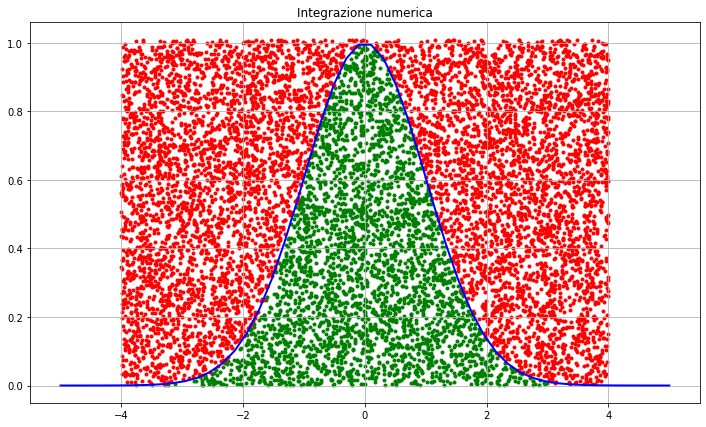

In [43]:
PUNTI=10000
a=-4
b=4
fmax=1.01
AREA=(b-a)*fmax
punti=0
 
xp=[]          # ASCISSE CASUALI
yp=[]          # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=[]          # ASCISSE CASUALI
yP=[]          # ORDINATE CASUALI --- SOPRA IL GRAFICO
 
for p in range(0,PUNTI):
# genera x alratoria uniforme in (a,b) 
  x=random.uniform(a,b)              
# genera y aleatoria uniforme in (0,fmax)                     
  y=random.uniform(0,fmax)                              
  if y <= f(x):                                   
    punti=punti+1
    xp.append(x) # punto sotto
    yp.append(y) 
  else:
    xP.append(x) # punto sopra
    yP.append(y)
area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.4f +/- %.4f" %(PUNTI,punti,area,sigma))
pi=(2*np.pi)**0.5
print("Area teorica: %.4f" %(pi))

# costruzione grafico
X=np.linspace(a-1,b+1)                                 
yf=[]
for x in X:
    yf.append(f(x))

#plot
figure(figsize=(12,7)) 
plt.grid()
plt.plot(X , yf, color="blue" , linewidth="2") 
plt.scatter(xp, yp, color="green", marker ="."  ) 
plt.scatter(xP, yP, color="red"  , marker ="."  ) 
plt.title("Integrazione numerica")

# **Seconda Parte:**

Definizione funzioni utili:

In [7]:
def f1(E):
  x=0
  if 0.1<E and E<0.9 :
    x=1/E
  return x

def f2(E,mu,sigma):
  var=sigma**2
  return (1/(2*np.pi*var)**0.5)*np.e**(-(E-mu)**2/(2*var))

def F(E):
  a1=1
  a2=1.5
  return a1*f1(E)+a2*f2(E,1,0.01)

def g(E, sigma):
  return E + sigma * E**0.5 * np.random.normal(0,1)

Utilizzo il metodo hit or miss per valutare l'area della funzione come spiegato precedentemente.

PUNTI=10000 punti=577 area=3.600 +/- 0.146


Text(0, 0.5, 'f(E)')

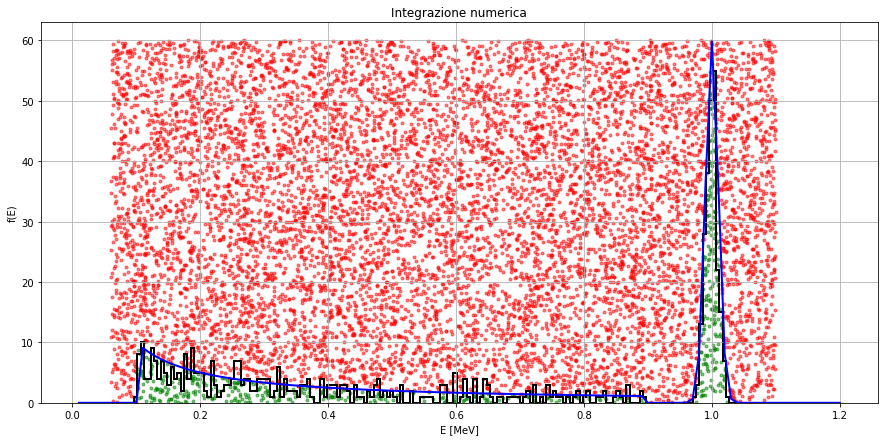

In [9]:
PUNTI=10000
a=0.06
b=1.1
fmax= 60
AREA = (b-a)*fmax
punti=0
 
xp=[]           # ASCISSE CASUALI
yp=[]           # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=[]           # ASCISSE CASUALI
yP=[]           # ORDINATE CASUALI --- SOPRA IL GRAFICO
 
for p in range(0,PUNTI):
  x=random.uniform(a,b)
  y=random.uniform(0,fmax)
  if y <= F(x):
    punti=punti+1
    xp.append(x) # punto sotto
    yp.append(y)  
  else:
    xP.append(x) # punto sopra
    yP.append(y)

area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.3f +/- %.3f" %(PUNTI,punti,area,sigma))

# genero la funzione
E=np.arange(0.01,1.21,0.01)
G=np.vectorize(F)
y=G(E)

# plot
figure(figsize=(15,7)) 
plt.grid()
plt.hist(xp, bins=200, range=(a,b), histtype = 'step', color = 'black', linewidth = 2 )
plt.plot(E , y, color="blue" , linewidth="2")
plt.scatter(xp, yp, color="green", marker ="." , alpha=0.5)
plt.scatter(xP, yP, color="red"  , marker ="." , alpha=0.5)
plt.title("Integrazione numerica")
plt.xlabel('E [MeV]')
plt.ylabel('f(E)')

## **Convoluzione**

La convoluzione viene calcolata su tre casi con diverse devianzioni standard. Estraggo una variabile aleatria da una distrubuzione gaussiana normalizzata $g_i=G(0,1)$, e da questa vado a calcolare la variabile aleatoria $g_i'$ della gaussiana $G(\mu,\sigma)$ secondo la relazione $g_i'=\mu+g_i\,\sigma$.\
Attraverso l'hit or miss io ho delle variabili aleatorie $x^*=E_i$. Il punto $E_i$ nel grafico di convoluzione di$f(E)$ con la gaussiana di sigma $\sigma \sqrt{E}$ non è altro che il punto $g_i'(E_i,\sigma \sqrt{E_i})$.\
Raccogliendo in un vettore tutti i punti convoluti per ogni $E_i$ raccolto precedentemente ottengo il grafico della funzione di convoluzione.

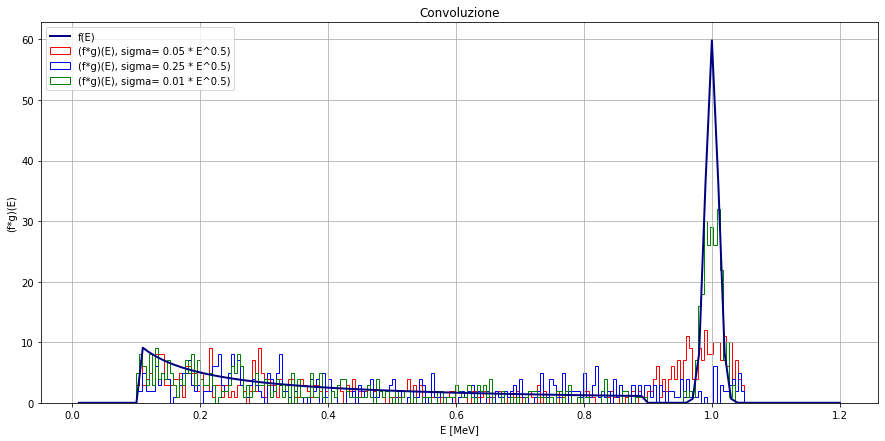

In [10]:
a=[]
b=[]
c=[]
sigma1 = 0.05
sigma2 = 0.25
sigma3 = 0.01

for i in range(0,len(xp)):
  a.append(g(xp[i], sigma1))
  b.append(g(xp[i], sigma2))
  c.append(g(xp[i], sigma3))

figure(figsize=(15,7)) 

plt.hist(a, bins=200, range=(0.1,1.05), histtype = 'step', color = 'red', linewidth = 1 , label = '(f*g)(E), sigma= 0.05 * E^0.5)')
plt.hist(b, bins=200, range=(0.1,1.05), histtype = 'step', color = 'blue', linewidth = 1 , label = '(f*g)(E), sigma= 0.25 * E^0.5)' )
plt.hist(c, bins=200, range=(0.1,1.05), histtype = 'step', color = 'green', linewidth = 1 , label = '(f*g)(E), sigma= 0.01 * E^0.5)' )
plt.plot(E , y, color="navy" , linewidth = 2,  label = 'f(E)')
plt.title('Convoluzione')
plt.xlabel('E [MeV]')
plt.ylabel('(f*g)(E)')
plt.grid()
plt.legend()

#**Terza Parte**

Definizione funzioni utili.\
Per le cross section so che posso cosiderarle come fossero delle PDF con variabili aleatorie $\cos(\theta)$ e $\phi$.\
Osservando che le $\frac{d\sigma}{d\Omega}$ sono funzione solo di $\cos(\theta)$, la distribuzione in $\phi$ dovrà essere uniforme in $(0,2\pi)$.\
Posso togliere la dipendenza da $\phi$ semplicemente integrando in $d\phi$ tra $(0,2\pi)$ e ciò mi restituirà solamente un valore $2\pi$.
Se voglio esplicitare la dipendenza da $\theta$ basta espandere $d\cos(\theta)\,=\,\sin(\theta)\,d\theta$, ottenendo alla fine:
\begin{cases}
d\sigma\,=\,(1+\cos^2(\theta))\,d\cos(\theta)\,d\phi\,&\rightarrow\,2\pi(1+\cos^2(\theta))\sin(\theta)d\theta\\
d\sigma\,=\,\sin^2(\theta)\,d\cos(\theta)\,d\phi\,&\rightarrow\,2\pi\sin^2(\theta)\sin(\theta)d\theta
\end{cases}

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt

# corss section
def cross_section(theta):
  return 2*np.pi*(1+np.cos(theta)**2)*np.sin(theta)

def cross_section_2(theta):
  return 2*np.pi*np.sin(theta)**3

# Funzione che genera il detector della grandezza che desidero
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

# Funzione che plotta il detector in 3D
def plotCubeAt2(positions, sizes, colors, **kwargs):
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s))
    return Poly3DCollection(np.concatenate(g), facecolors=np.repeat(colors,6), **kwargs)

# Funzione che genera la retta del percorso della particella
def retta(phi,theta):
  r=3.5
  line=[]
  line.append(r*np.cos(phi)*np.sin(theta))
  line.append(r*np.sin(phi)*np.sin(theta))
  line.append(r*np.cos(theta))
  return line

# Funzione che calcola se una particella decade o no: prende come informazioe la distanza che percorre la particella nel rilevatore,
# genera un numero aleatorio su una distribuzione esponenziale con lunghezza di assorbimento unitaria. La funzione restituisce 1 se 
# la distanza corrispondente al numero aleatorio generato è superiore a quella percorsa dalla particella, zero se è minore e quindi 
#se la particella è decaduta prima di arrivare al detector
def assorbimento(rho):
  rand = np.random.exponential(1)
  if -np.log(rand)>rho:
    return 1
  else:
    return 0 


## **Cross Section = 1 + cos^2(x)**

Il metodo usato è il classico hit or miss, ma in questo caso vaso a selezionarmi solo le particelle che arrivano nello specchio del rilevatore.\
In coordinate sferiche ho che:
\begin{cases}
  x\,=\, \rho*\cos(\phi)*\sin(\theta)\\
  y\,=\, \rho*\sin(\phi)*\sin(\theta)\\
  z\,=\, \rho*cos(\theta)
\end{cases}
in cui $\theta$ varia tra $(0,\pi)$ e $\phi$ vatia tra $(0,2\pi)$.\
Inserendo le coordinate di $x$, $y$ e $z$ del rilevatore so che:
\begin{cases}
-\frac{1}{2}\leq x \leq \frac{1}{2}\\
          1 \leq y \leq 2\\
           z = 2          
\end{cases}
per cui abbiamo che posso consderare solo le particelle emesse con angoli compresi tra ($\rho=\frac{2}{\cos(\theta)}$):
\begin{cases}
-\frac{1}{4} \leq \cos(\phi)\tan(\theta) \leq \frac{1}{4}\\
\frac{1}{2} \leq \sin(\phi)\tan(\theta) \leq 1
\end{cases}
inoltre va aggiunta la condizione $\cos(\theta)>0$ per selezionare solo le particelle emesse verso l'alto ed eliminare quelle diametralmente opposte.

PUNTI=10000 punti=7611 area=16.737 +/- 0.094
90


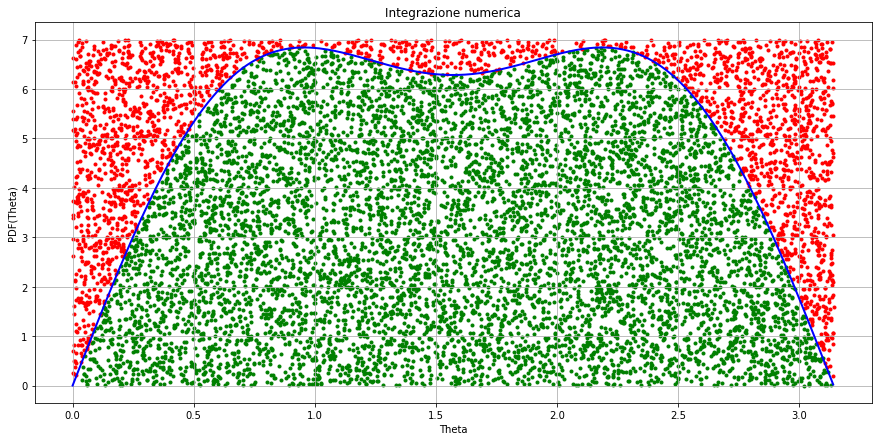

In [20]:
PUNTI=10000
a=0
b=np.pi
fmax=7
AREA=(b-a)*fmax
punti=0

tmp =   []         # lista per le phi utili
P =     []         # emissioni utili
xp=     []         # ASCISSE CASUALI
yp=     []         # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=     []         # ASCISSE CASUALI
yP=     []         # ORDINATE CASUALI --- SOPRA IL GRAFICO

for p in range(0,PUNTI):
  x = random.uniform(a,b)
  y = random.uniform(0,fmax)
  if y <= cross_section(x):
    punti=punti+1
    xp.append(x) # punto sotto
    yp.append(y)
    R = np.random.uniform(0,2*np.pi)
    tmp.append(R)
    if np.cos(x)>0 :
      if -1/4 < np.tan(x)*np.cos(R) and np.tan(x)*np.cos(R) < 1/4 :
        temp = []
        temp.append(R)
        if 1/2 < np.sin(R)*np.tan(x) and np.sin(R)*np.tan(x) < 1 :
          temp.append(x)
          P.append(temp)
  else:
    xP.append(x) # punto sopra
    yP.append(y)

area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.3f +/- %.3f" %(PUNTI,punti,area,sigma))

E=np.arange(a, b, 0.01)
G=np.vectorize(cross_section)
y=G(E)

figure(figsize=(15,7)) 
plt.grid()
plt.plot(E , y, color="blue" , linewidth="2")
plt.scatter(xp, yp, color="green", marker ="."  ) 
plt.scatter(xP, yP, color="red"  , marker ="."  ) 
plt.xlabel('Theta')
plt.ylabel('PDF(Theta)')
plt.title("Integrazione numerica")
print(len(P))

Proiezioe su una sfera di raggio $\rho=2$ delle particelle emesse secondo la sezione d'urto.

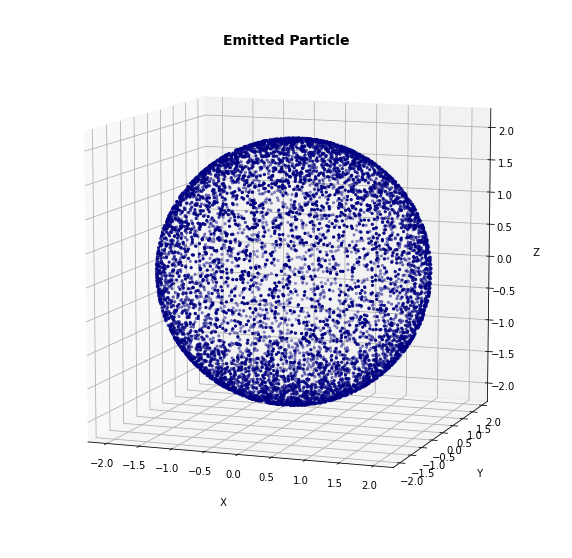

In [21]:
# plot 
xp = np.array(xp)
tmp= np.array(tmp)
radius= 2*np.ones(len(xp))
a=[]
b=[]
c=[]
for i in range(0,len(xp)):
  a.append(radius[i]* np.cos(tmp[i])* np.sin(xp[i]))
  b.append(radius[i]* np.sin(tmp[i])* np.sin(xp[i]))
  c.append(radius[i]* np.cos(xp[i]))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.scatter(a,b,c, color='navy', s=5)
ax.set_title('Emitted Particle',fontsize=14,fontweight="bold")
ax.set_xlabel(' X ', labelpad=15)
ax.set_ylabel(' Y ', labelpad=15)
ax.set_zlabel(' Z ',labelpad=15)
ax.view_init(10,-70)

Costruzione cubo e rilevatore e rette raffiguranti le traiettorie delle particelle che attraversano il cubo.

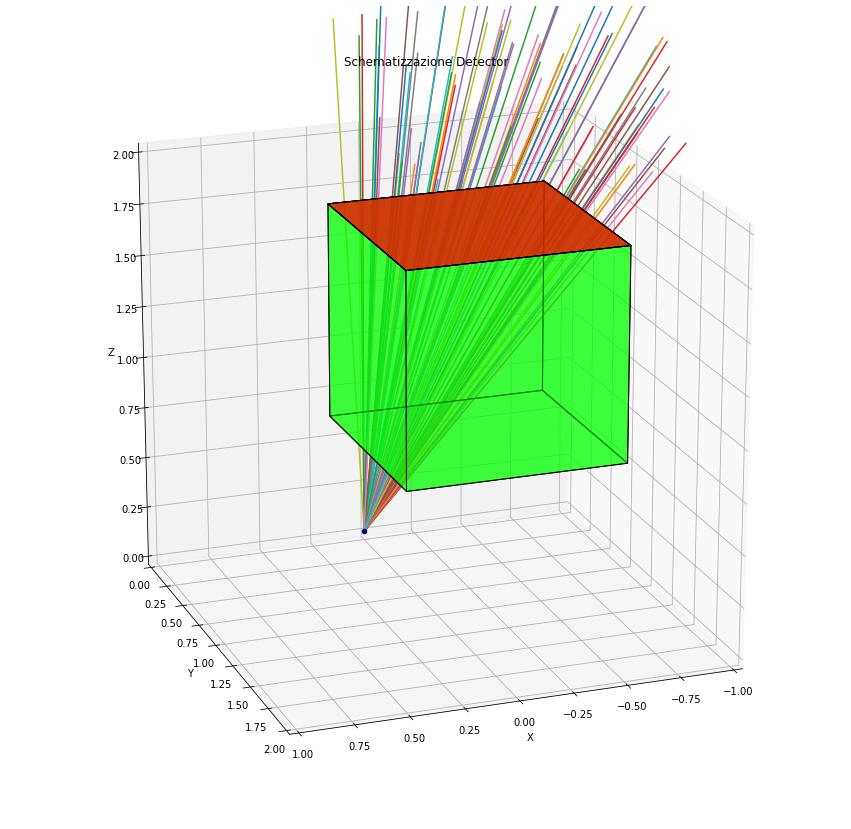

In [22]:
positions = [(-1/2,1,1),(-1/2,1,2)]
sizes = [(1,1,1),(1,1,0)]
colors = ["lime","red"]

# Creazione parametri delle rette
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
for i in range(0,len(P)):
  X=[0]
  Y=[0]
  Z=[0]
  X.append(retta(P[i][0],P[i][1])[0])
  Y.append(retta(P[i][0],P[i][1])[1])
  Z.append(retta(P[i][0],P[i][1])[2])
  ax.plot3D(X,Y,Z)

# plot
pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k", alpha=0.5)
ax.add_collection3d(pc) 
ax.scatter(0,0,0, color='navy')
ax.set_title('Schematizzazione Detector')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_ylim(0,2)
ax.set_zlim(0,2)
ax.set_xlim(-1,1)
ax.view_init(20,70)

Assorbimento delle larticelle emesse verso il rilevatore.\
Il calcolo del percorso fatto all'interno del rilevatore è semplicemente geometrico: so che il raggio tatale percorso da una particella dal pinto di emissione alla superficie del detector è uguale a:\
\begin{equation}
\rho_{tot}\,=\,\frac{2}{\cos(\theta)}
\end{equation}
La traiettoria della particella è tale per cui essa entra nel rilevatore nel momento in cui $y=1$, quindi posso calcolare la distanza per cui la particella viaggia prima di entare nel rilevatore:
\begin{equation}
\rho_{out}\,=\,\frac{1}{\sin(\phi)\sin(\theta)}
\end{equation}
La distande percorsa nel rilevatoe è quindi $\rho_{tot}-\rho_{out}$.
Comparando questa distanda con quella trovata attraverso la funzione aleatoria esponenziale posso conoscere se la particella è decaduta nel cubo o è riuscita ad arrivare sul rilevatore.

In [23]:
# distanza origine rilevatore per perticella:
distance=[]
for i in range(0,len(P)):
  dis_tot = 2/(np.cos(P[i][1]))
  dis_out = 1/(np.sin(P[i][0])*np.sin(P[i][1]))
  distance.append(dis_tot-dis_out)
# Assorbimento  percentuale materiale:
Abs = []
Abs_save=[]
k=0

for i in range(0,len(P)):  
  dec = assorbimento(distance[i])
  Abs.append(1-dec)
  if dec == 1:
    Abs_save.append(P[i])
    k += 1
print('Il numero di particelle assorbite è: %i'%(len(P)-k))
print('L assorbimento medio del materiale è: %.2f (per cento) '%(sum(Abs)*100 / len(Abs)))

Il numero di particelle assorbite è: 64
L assorbimento medio del materiale è: 71.11 (per cento) 


Immagine 2D del rilevatore e gli spot in cui è stato colpito dalle particelle:

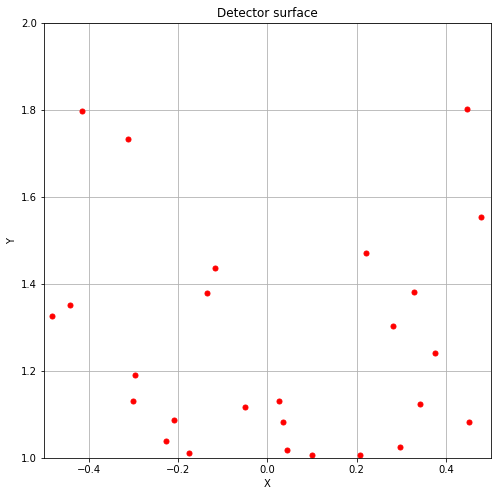

In [24]:
# Hit delle particelle
hit_x = []
hit_y = []
for i in range(0,len(Abs_save)):
  r = 2/(np.cos(Abs_save[i][1]))
  x = r*np.cos(Abs_save[i][0])*np.sin(Abs_save[i][1])
  hit_x.append(x)
  y = r*np.sin(Abs_save[i][0])*np.sin(Abs_save[i][1])
  hit_y.append(y)
figure(figsize=(8,8))
plt.plot(hit_x,hit_y,'r.', markersize=10)
plt.title('Detector surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-1/2,1/2)
plt.ylim(1,2)
plt.grid()

**Accettanza**: L'accettanza è il numero di particelle rilevate rapportate al numero di eventi emessi:
\begin{equation}
A\,=\,\frac{particelle\,rilevate}{particelle\,totali\,emese}
\end{equation}

In [25]:
A=len(P)/len(xp)
print('L ACCETTANZA è: %.3f (per cento)' %(A*100))

L ACCETTANZA è: 1.182 (per cento)


## **Cross Section = sin^2(x)**

PUNTI=10000 punti=4218 area=8.348 +/- 0.098
23


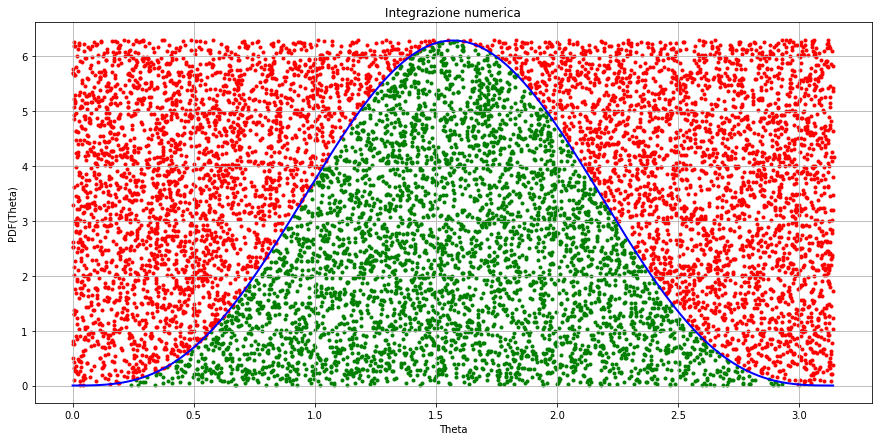

In [31]:
PUNTI=10000
a=0
b=np.pi
fmax=6.3
AREA=(b-a)*fmax
punti=0

tmp =   []         # lista per le phi utili
P =     []         # emissioni utili
xp=     []         # ASCISSE CASUALI
yp=     []         # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=     []         # ASCISSE CASUALI
yP=     []         # ORDINATE CASUALI --- SOPRA IL GRAFICO

for p in range(0,PUNTI):
  x = random.uniform(a,b)
  y = random.uniform(0,fmax)
  if y <= cross_section_2(x):
    punti=punti+1
    xp.append(x) # punto sotto
    yp.append(y)
    R = np.random.uniform(0,2*np.pi)
    tmp.append(R)
    if np.cos(x)>0 :
      if -1/4 < np.tan(x)*np.cos(R) and np.tan(x)*np.cos(R) < 1/4 :
        temp = []
        temp.append(R)
        if 1/2 < np.sin(R)*np.tan(x) and np.sin(R)*np.tan(x) < 1 :
          temp.append(x)
          P.append(temp)
  else:
    xP.append(x) # punto sopra
    yP.append(y)

area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.3f +/- %.3f" %(PUNTI,punti,area,sigma))

E=np.arange(a, b, 0.01)
G=np.vectorize(cross_section_2)
y=G(E)

figure(figsize=(15,7)) 
plt.grid()
plt.plot(E , y, color="blue" , linewidth="2")
plt.scatter(xp, yp, color="green", marker ="."  ) 
plt.scatter(xP, yP, color="red"  , marker ="."  ) 
plt.xlabel('Theta')
plt.ylabel('PDF(Theta)')
plt.title("Integrazione numerica")
print(len(P))

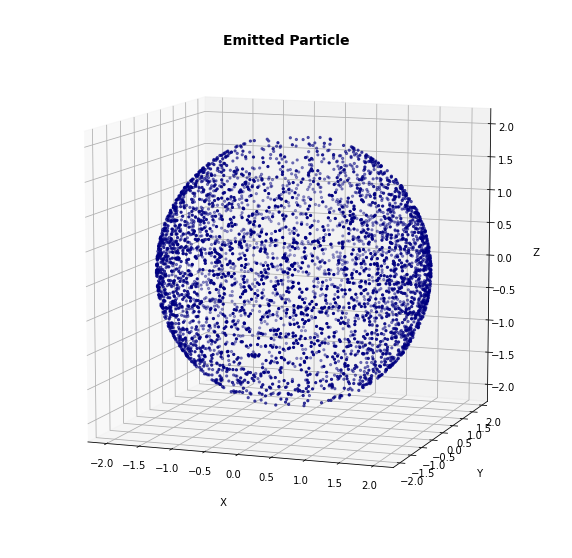

In [33]:
# plot 
xp = np.array(xp)
tmp= np.array(tmp)
radius= 2*np.ones(len(xp))
a=[]
b=[]
c=[]
for i in range(0,len(xp)):
  a.append(radius[i]* np.cos(tmp[i])* np.sin(xp[i]))
  b.append(radius[i]* np.sin(tmp[i])* np.sin(xp[i]))
  c.append(radius[i]* np.cos(xp[i]))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.scatter(a,b,c, color='navy', s=5)
ax.set_title('Emitted Particle',fontsize=14,fontweight="bold")
ax.set_xlabel(' X ', labelpad=15)
ax.set_ylabel(' Y ', labelpad=15)
ax.set_zlabel(' Z ',labelpad=15)
ax.view_init(10,-70)

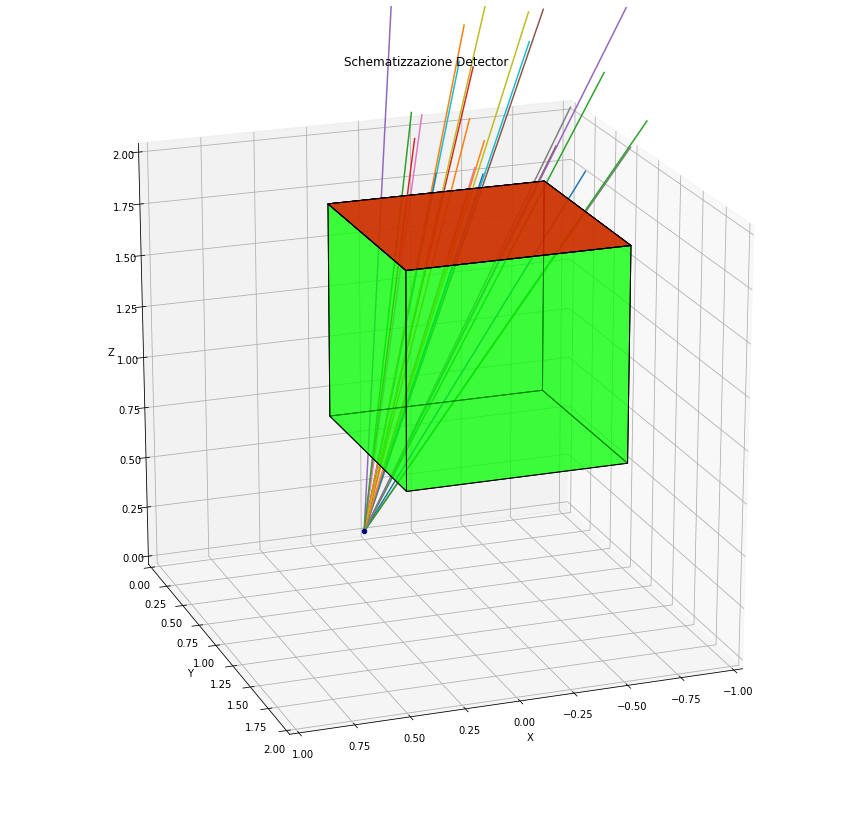

In [34]:
# costruzione cubo + rilevatore
positions = [(-1/2,1,1),(-1/2,1,2)]
sizes = [(1,1,1),(1,1,0)]
colors = ["lime","red"]

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
for i in range(0,len(P)):
  X=[0]
  Y=[0]
  Z=[0]
  X.append(retta(P[i][0],P[i][1])[0])
  Y.append(retta(P[i][0],P[i][1])[1])
  Z.append(retta(P[i][0],P[i][1])[2])
  ax.plot3D(X,Y,Z)

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k", alpha=0.5)
ax.add_collection3d(pc) 
ax.scatter(0,0,0, color='navy')
ax.set_title('Schematizzazione Detector')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_ylim(0,2)
ax.set_zlim(0,2)
ax.set_xlim(-1,1)
ax.view_init(20,70)

**Assorbimento**:

In [38]:
# distanza origine rilevatore per perticella:
distance=[]
for i in range(0,len(P)):
  dis_tot = 2/(np.cos(P[i][1]))
  dis_out = 1/(np.sin(P[i][0])*np.sin(P[i][1]))
  distance.append(dis_tot-dis_out)
# Assorbimento  percentuale materiale:
Abs = []
Abs_save=[]
k=0

for i in range(0,len(P)):  
  dec = assorbimento(distance[i])
  Abs.append(1-dec)
  if dec == 1:
    Abs_save.append(P[i])
    k += 1
print('Il numero di particelle assorbite è: %i'%(len(P)-k))
print('L assorbimento medio del materiale è: %.2f (per cento) '%(sum(Abs)*100 / len(Abs)))

Il numero di particelle assorbite è: 15
L assorbimento medio del materiale è: 65.22 (per cento) 


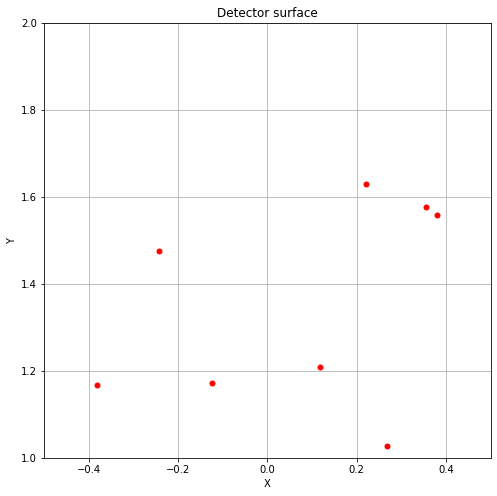

In [39]:
# Hit delle particelle
hit_x = []
hit_y = []
for i in range(0,len(Abs_save)):
  r = 2/(np.cos(Abs_save[i][1]))
  x = r*np.cos(Abs_save[i][0])*np.sin(Abs_save[i][1])
  hit_x.append(x)
  y = r*np.sin(Abs_save[i][0])*np.sin(Abs_save[i][1])
  hit_y.append(y)
figure(figsize=(8,8))
plt.plot(hit_x,hit_y,'r.', markersize=10)
plt.title('Detector surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-1/2,1/2)
plt.ylim(1,2)
plt.grid()

**Accettanza**:

In [40]:
A=len(P)/len(xp)
print('L ACCETTANZA è: %.3f (per cento)' %(A*100))

L ACCETTANZA è: 0.545 (per cento)
